# Estilos de Texto
La mayoría de librerías me permiten personalizar el texto que utilizo en mis graficos. Esto incluye Título, Ejes, y Ticks. 
- Fuente, Tamaño, Color, Estilo (negritas, cursiva)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

# Algunos ambientes van a necesitar este modo para poder visualizar los graficos de Plotly
import plotly
plotly.offline.init_notebook_mode(connected=True)

In [2]:
df = pd.read_csv('../data/tiendas_procesado.csv', index_col='fecha')
df

,DAIRY,MEATS,SEAFOOD
fecha,,,
2015-01,1134521.0,543117.728891,40465.835012
2015-02,1020747.0,498735.076839,36066.561003
2015-03,1234851.0,546517.159221,43808.473074
2015-04,1181180.0,522304.280744,39983.471003
2015-05,1293308.0,591691.899734,42506.832015
2015-06,1243588.0,565014.130035,38780.552004
2015-07,1244815.0,594903.677368,38535.588006
2015-08,1263428.0,581214.143026,37767.580998
2015-09,1224619.0,562711.633157,41906.374010


# Pandas

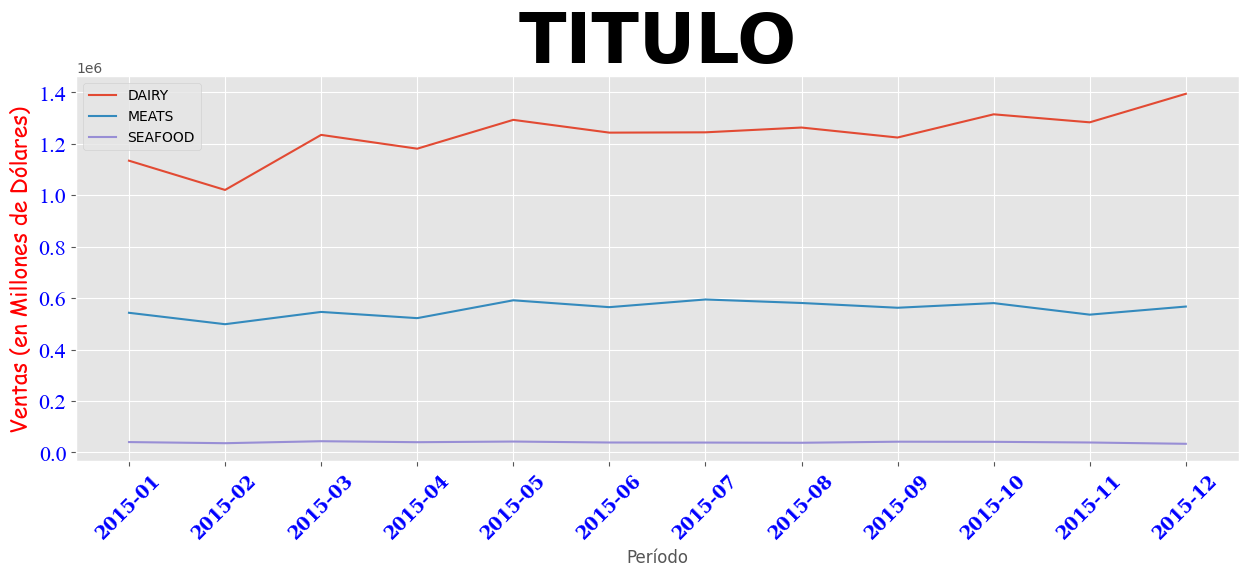

In [3]:
plt.style.use(
    'ggplot' 
)
ax = df.plot.line(
    figsize=(15, 5),
    title='Ventas de 3 Tipos de Productos por Año'
)

ax.set_title(
    'TITULO',
    fontdict={
        'size': 50,
        'weight': 'bold'
    }
)

ax.set_xlabel('Período')

# Cada uno de los metodos para configurar texto, admite un diccionario llamado fontdict
# Lista completa de posibles configuraciones: https://matplotlib.org/stable/tutorials/text/text_props.html
ax.set_ylabel(
    'Ventas (en Millones de Dólares)',
    fontdict={
        'name': 'Comic Sans MS',
        'color': 'red',
        'size': 16
    }
)

ax.set_xticks(np.arange(0, len(df))) 
ax.set_xticklabels(
    df.index.values, 
    rotation=45,
    fontdict={
        'color':  'blue',
        'weight': 'bold',
        'size': 13,
        'family': 'serif'
    }
)

# Metodo GLOBAL
# Me sirve para cambiar estilos sin definir los labels como tal
plt.yticks(
    fontsize=16,
    color='blue',
    name='Times New Roman'
)

plt.show()

# Seaborn

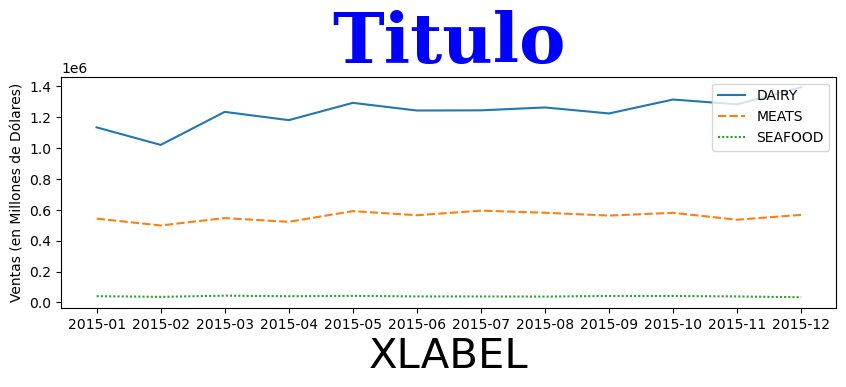

In [3]:
plt.figure(
    figsize=(10, 3)
)

ax = sns.lineplot(
    df
)

ax.set(
    xlabel='Período', 
    ylabel='Ventas (en Millones de Dólares)',
    title='Ventas de 3 Tipos de Productos por Año (Seaborn)'
)

# Misma logica que Pandas
ax.set_title(
    'Titulo',
    fontdict={
        'color':  'blue',
        'weight': 'bold',
        'size': 50,
        'family': 'serif'
    }
)

ax.set_xlabel(
    'XLABEL',
    fontdict={
        'size': 30
    }
)

plt.show()

# Plotly

In [4]:
fig = px.line(
    df,
    width=800, 
    height=500,
    template='ggplot2',
    title='Ventas de 3 Tipos de Productos por Año', 
    labels={
        "fecha": "Periodo",
        "value": "Ventas por año (en millones de $)",
        "variable": "Tipo de Producto"
    }
)

# Configuraciones de TEXTO globales para el gráfico
# https://plotly.com/python/figure-labels/#global-and-local-font-specification
fig.update_layout( 
    font_family="Courier New", # Para todo el gráfico. Puede ser sobreescrita por otras configuraciones
    font_color="blue", # Para todo el gráfico. Puede ser sobreescrita por otras configuraciones
    title_font_family="Times New Roman", # Solo del título del grafico
    title_font_color="red", # Solo del titulo del grafico
    legend_title_font_color="green", # Solo del titulo de la leyenda
    legend_font_color='black' # Del resto del texto de la leyenda
)

# Configuraciones de TEXTO locales a los Ejes y a los Ticks
# https://plotly.com/python/figure-labels/#global-and-local-font-specification
fig.update_xaxes(
    title_font_family="Arial", # Solo el titulo del Eje
    title_font_color='black', # Solo el titulo del Eje
    title_font_size=26, # Solo el titulo del Eje
    tickangle=45,
    tickmode='array',
    tickvals=df.index.values,
    tickfont={ # Configuraciones de fuente para los ticks
        'family': 'Rockwell', 
        'color': 'brown', 
        'size': 10
    }
)

fig.update_yaxes(
    nticks=20
)

fig.show()